In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob

# Extract data from MISR-estimated roughness files by using MTK library. Should use python3.6 for this purpose 

In [2]:
# # atm_day_time = "2016-04-29T11:30:28Z"
# atm_day_time = "2016-04-22T07:00:00Z"
# orbit_path = mtk.time_to_orbit_path(atm_day_time)
# orbit_path[1]

In [3]:
# mtk.latlon_to_bls(orbit_path[1], 275, 71.753154, 203.918)

## Plot ATM-MISR Transect 

In [4]:
# atm_file = "insample_atm_withPathOrbit_3cams_forTransect_oldcodemethod.csv"
atm_file = "insample_atm_withPathOrbit_3cams_forTransect.csv"

atm_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data"
atm_data_fp = os.path.join(atm_dir, atm_file)

In [5]:
transect_small = pd.read_csv(atm_data_fp)
transect_small

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms
0,1,152,86922,9,75.15,1205.60,74.422639,215.545163,0.84397,1.39007,0.59725,5.19
1,2,152,86922,9,74.95,1205.52,74.422351,215.546735,0.83645,1.39609,0.58973,5.72
2,3,152,86922,9,74.76,1205.45,74.422064,215.548307,0.83645,1.39609,0.58973,6.33
3,4,152,86922,9,74.92,1205.51,74.422294,215.547049,0.83645,1.39609,0.58973,5.97
4,5,152,86922,9,75.10,1205.71,74.422393,215.544545,0.84397,1.39007,0.59725,5.18
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,79,86932,29,417.91,1364.11,74.244492,215.095957,0.85789,0.96812,0.80035,6.02
9996,9997,79,86932,29,417.90,1364.32,74.244203,215.097542,0.85789,0.96812,0.80035,7.34
9997,9998,79,86932,29,417.91,1364.13,74.244466,215.096102,0.85789,0.96812,0.80035,6.13
9998,9999,79,86932,29,418.03,1363.90,74.244545,215.093780,0.85494,0.96673,0.80104,7.45


In [6]:
transect_small = transect_small.iloc[0:100]
transect_small.iloc[0]

Unnamed: 0        1.000000
path            152.000000
orbit         86922.000000
block             9.000000
line             75.150000
sample         1205.600000
lat              74.422639
lon             215.545163
Ca_r              0.843970
Cf_r              1.390070
An_r              0.597250
rms               5.190000
Name: 0, dtype: float64

In [7]:
roughness_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/roughness_predicted_from_PH"


In [8]:
# extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
transect_from_misr_list = []

for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
    print("DF row: %s" %irow)
    poll_bls = transect_small[['path','orbit','lat','lon','block','line','sample']].iloc[irow]
    
    path_int = int(poll_bls[0])
    orbit_int = int(poll_bls[1])
    lat = poll_bls[2]
    lon = poll_bls[3]
    
    block_int = int(poll_bls[4])
    line_int = int(poll_bls[5])
    sample_int = int(poll_bls[6])
    
#     print(block_int)
#     print(line_int)
#     print(sample_int)
    
#     print("path: %s" %path_int)
#     print("orbit: %s" %orbit_int)
#     print("lat: %s" %lat)
#     print("lon: %s" %lon)
    
    
    # Q- now that we have found many paths, how figure out to select which path?
#     bls = mtk.latlon_to_bls(path_int, 275 , lat, lon)
#     print("MTK block-line-sample: (%s, %s, %s)" %bls)
    
    # check block digits
    if block_int < 10:
        block_str = str(block_int).zfill(2)


    # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
    if path_int < 100:
        print(path_int)
        path_str = str(path_int).zfill(3)
        print(path_str)
    else:
        path_str = str(path_int)
        
        
        
        
    # find the pattern
    roughness_file = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit_int)+"_B0"+block_str+".dat"
#     print(roughness_filepattern)
    
    rough_file_fp = os.path.join(roughness_dir, roughness_file)
#     print(rough_file_fp)

    # check if file is in storage
#     print(os.path.isfile(rough_file_fp))
    roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_file))
    print("roughness file found: %d" %len(roughness_file_found_list))

    if (len(roughness_file_found_list) > 1):
        raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

    if (len(roughness_file_found_list) <= 0):
        print("roughness file not found- continue to next path")
        continue

    # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
    rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)

#     pixel_row = int(bls[1])
#     pixel_col = int(bls[2])
    
    roughness_per_pixel = rough_2d_arr[line_int, sample_int]
#     print("%.3f" %roughness_per_pixel)
    
    if roughness_per_pixel < 0:
        continue
    else:
        transect_from_misr_list.append(roughness_per_pixel)


DF row: 0
roughness file found: 1
DF row: 1
roughness file found: 1
DF row: 2
roughness file found: 1
DF row: 3
roughness file found: 1
DF row: 4
roughness file found: 1
DF row: 5
roughness file found: 1
DF row: 6
roughness file found: 1
DF row: 7
roughness file found: 1
DF row: 8
roughness file found: 1
DF row: 9
roughness file found: 1
DF row: 10
roughness file found: 1
DF row: 11
roughness file found: 1
DF row: 12
roughness file found: 1
DF row: 13
roughness file found: 1
DF row: 14
roughness file found: 1
DF row: 15
roughness file found: 1
DF row: 16
roughness file found: 1
DF row: 17
roughness file found: 1
DF row: 18
roughness file found: 1
DF row: 19
roughness file found: 1
DF row: 20
roughness file found: 1
DF row: 21
roughness file found: 1
DF row: 22
roughness file found: 1
DF row: 23
roughness file found: 1
DF row: 24
roughness file found: 1
DF row: 25
roughness file found: 1
DF row: 26
roughness file found: 1
DF row: 27
roughness file found: 1
DF row: 28
roughness file foun

In [9]:
# # extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
# transect_from_misr_list = []

# for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
#     print("DF row: %s" %irow)
#     poll_bls = transect_small[['#path',' orbit',' lat',' lon',' img_block',' line',' sample']].iloc[irow]
    
#     path_int = int(poll_bls[0])
#     orbit_int = int(poll_bls[1])
#     lat = poll_bls[2]
#     lon = poll_bls[3]
    
#     block_int = int(poll_bls[4])
#     line_int = int(poll_bls[5])
#     sample_int = int(poll_bls[6])
    
#     print(block_int)
#     print(line_int)
#     print(sample_int)
    
#     print("path: %s" %path_int)
#     print("orbit: %s" %orbit_int)
#     print("lat: %s" %lat)
#     print("lon: %s" %lon)
    
    
#     # Q- now that we have found many paths, how figure out to select which path?
# #     bls = mtk.latlon_to_bls(path_int, 275 , lat, lon)
# #     print("MTK block-line-sample: (%s, %s, %s)" %bls)
    
#     # check block digits
#     if block_int < 10:
#         block_str = str(block_int).zfill(2)
#     else:
#         block_str = str(block_int)


#     # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
#     if path_int < 100:
#         print(path_int)
#         path_str = str(path_int).zfill(3)
#         print(path_str)
#     else:
#         path_str = str(path_int)
        
        
        
        
#     # find the pattern
#     roughness_file = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit_int)+"_B0"+block_str+".dat"
# #     print(roughness_filepattern)
    
#     rough_file_fp = os.path.join(roughness_dir, roughness_file)
# #     print(rough_file_fp)

#     # check if file is in storage
# #     print(os.path.isfile(rough_file_fp))
#     roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_file))
#     print("roughness file found: %d" %len(roughness_file_found_list))

#     if (len(roughness_file_found_list) > 1):
#         raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

#     if (len(roughness_file_found_list) <= 0):
#         print("roughness file not found- continue to next path")
#         continue

#     # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
#     rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
# #     print(rough_2d_arr.shape)

# #     pixel_row = int(bls[1])
# #     pixel_col = int(bls[2])
    
#     roughness_per_pixel = rough_2d_arr[line_int, sample_int]
# #     print("%.3f" %roughness_per_pixel)
    
#     if roughness_per_pixel < 0:
#         continue
#     else:
#         transect_from_misr_list.append(roughness_per_pixel)


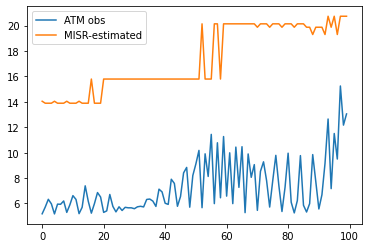

In [10]:
# plot transect
# transect_small["rms"].plot(x=transect_small.index)#, y=transect_small)
# plt.plot(transect_from_misr)

x = transect_small.index
plt.plot(x, transect_small["rms"])
plt.plot(x, transect_from_misr_list)
plt.legend(["ATM obs","MISR-estimated"])

In [11]:
transect_small.index

RangeIndex(start=0, stop=100, step=1)

## statistics

In [12]:
transect_small.describe()

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms
count,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,152.0,86922.0,9.0,74.399700,1206.845300,74.419412,215.539463,0.838255,1.378251,0.586751,7.300500
std,29.011492,0.0,0.0,0.0,0.357167,0.801383,0.001779,0.004573,0.004753,0.011876,0.003380,2.122555
min,1.000000,152.0,86922.0,9.0,73.670000,1205.450000,74.416212,215.530485,0.833440,1.355470,0.583710,5.180000
25%,25.750000,152.0,86922.0,9.0,74.115000,1206.165000,74.417917,215.535668,0.833440,1.367510,0.584842,5.737500
50%,50.500000,152.0,86922.0,9.0,74.405000,1206.840000,74.419401,215.539522,0.836450,1.384060,0.585220,6.340000
75%,75.250000,152.0,86922.0,9.0,74.682500,1207.517500,74.420901,215.543329,0.839460,1.384060,0.589730,8.440000
max,100.000000,152.0,86922.0,9.0,75.150000,1208.250000,74.422639,215.548307,0.846980,1.396090,0.597250,15.250000


## histogram

<AxesSubplot:>

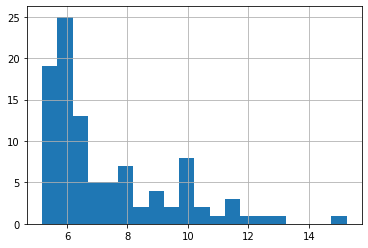

In [13]:
transect_small["rms"].hist(bins=20, alpha=1)